<a href="https://colab.research.google.com/github/shaun420-20/Car-Price-Prediction-using-Machine-Learning-/blob/main/delta_variant_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
df= pd.read_csv('/content/Deltavariant06-10_twitter.csv',low_memory=False)

In [63]:
df['content']

0        "No queremos ver el daño social, psicológico y...
1        I’ve been &amp; am totally rule compliant.  Ma...
2        The #DeltaVariant (#Delta #variant) originally...
3        Funny how only this latest variant is affectin...
4        Wow appalling tabloid journalism from #evandav...
                               ...                        
24026    THE VIRAL LOAD FROM THE DELTA VARIANT IS 1200 ...
24027    New type of 'Delta variant' is spreading in De...
24028    Iove seeing everyone #vaccinated lying to them...
24029    #coronavirus #SARSCoV2 #COVID19 #DeltaVariant ...
24030    #Covid_19 #COVIDー19 #Delta #DeltaVariant \nUS ...
Name: content, Length: 24031, dtype: object

In [64]:


!pip install texthero


In [65]:
import numpy as np
import pandas as pd
from copy import deepcopy

import texthero as hero
hero.top_words(df['content'].pipe(hero.clean))

deltavariant    23958
co              18196
https           18165
covid19          7934
covid            6534
                ...  
overstroomt         1
cmikesf             1
ptzhjz7n2g          1
lpkjqnygzu          1
tekrarini           1
Name: content, Length: 66778, dtype: int64

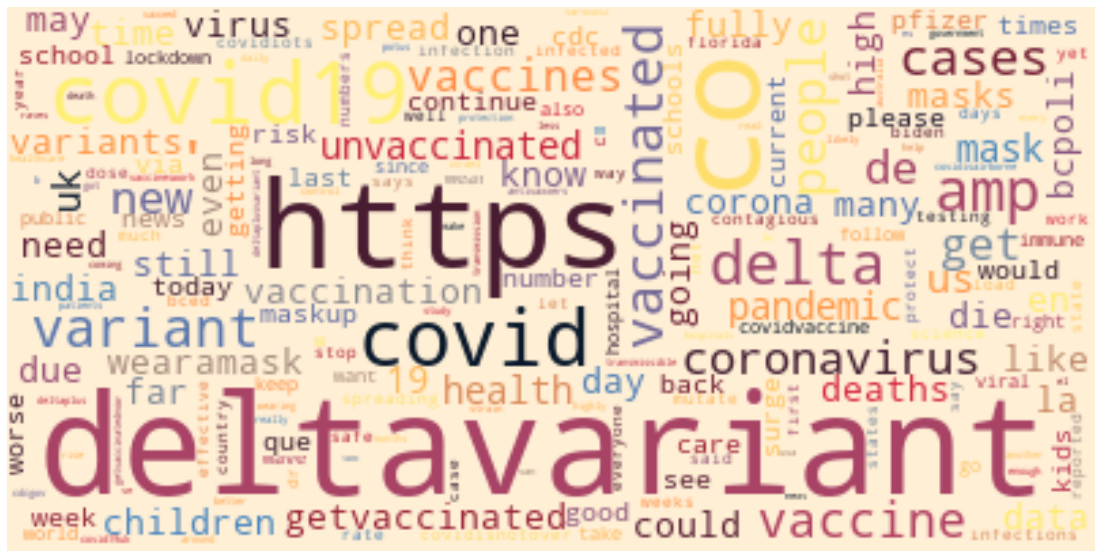

In [66]:
hero.wordcloud(df['content'].pipe(hero.clean))

In [67]:
!pip install clean-text

In [68]:
import pandas as pd
import html
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [69]:
for i in range (len(df['content'])):

  x = df['content'].astype(str)[i].replace('\n','') #cleaning newline “\n” from the tweets
df['content'][i] = html.unescape(x)
df['content'].head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0    "No queremos ver el daño social, psicológico y...
1    I’ve been &amp; am totally rule compliant.  Ma...
2    The #DeltaVariant (#Delta #variant) originally...
3    Funny how only this latest variant is affectin...
4    Wow appalling tabloid journalism from #evandav...
5    No #COVID19 death (bank holiday lag) but 𝟯,𝟭𝟲𝟱...
6    Well someone’s unaware of the #DeltaVariant .....
7    இந்தியாவில் கண்டறியப்பட்ட உருமாற்றம் அடைந்த கொ...
8    Ob wir es nach Welle 4 im Herbst kapieren mit ...
9    @BJennings90 @guardian So basically now counti...
Name: content, dtype: object

In [70]:
df['content'].head(10)

0    "No queremos ver el daño social, psicológico y...
1    I’ve been &amp; am totally rule compliant.  Ma...
2    The #DeltaVariant (#Delta #variant) originally...
3    Funny how only this latest variant is affectin...
4    Wow appalling tabloid journalism from #evandav...
5    No #COVID19 death (bank holiday lag) but 𝟯,𝟭𝟲𝟱...
6    Well someone’s unaware of the #DeltaVariant .....
7    இந்தியாவில் கண்டறியப்பட்ட உருமாற்றம் அடைந்த கொ...
8    Ob wir es nach Welle 4 im Herbst kapieren mit ...
9    @BJennings90 @guardian So basically now counti...
Name: content, dtype: object

In [72]:
tweet=df['content'].values.tolist()

In [81]:
import numpy as np
import re
 
def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stop_words]
    temp = " ".join(word for word in temp)
    return temp

In [83]:
results = [clean_tweet(tw) for tw in tweet]


In [85]:
from textblob import TextBlob

import tweepy 
import sys 

In [86]:
polarity = 0 
positive = 0 
negitive = 0 
neutral = 0

for tweet in results :
  final_text = tweet.replace('RT','')
  if final_text.startswith('@'):
    position = final_text.index(':')
    final_text = final_text[position+2:]
  if final_text.startswith('@'):
    position = final_text.index('')
    final_text = final_text[position+2:]
  analysis = TextBlob(final_text) 
  tweet_polarity = analysis.polarity
  if tweet_polarity > 0 :
    positive += 1 
  elif tweet_polarity< 0 :
    negitive += 1 
  else:
    neutral += 1
  polarity += tweet_polarity
print(polarity)
print(f'Amount of positive tweets:{positive}')
print(f'Amount of negitive tweets:{negitive}')
print(f'Amount of neutral tweets:{neutral}')


892.6504805736715
Amount of positive tweets:8180
Amount of negitive tweets:4834
Amount of neutral tweets:11017


In [95]:
import matplotlib.pyplot as plt
df1 = pd.DataFrame (results, columns = ['cleaned_tweets'])
df1


,cleaned_tweets
0,queremos ver el da social psicol gico econ mic...
1,amp totally rule compliant mainly feel like tr...
2,originally discovered india last december beco...
3,funny latest variant affecting younger generat...
4,wow appalling tabloid journalism explaining so...
...,...
24026,viral load delta variant 1200 times covid19 du...
24027,new type delta variant spreading denmark
24028,iove seeing everyone lying case milder actuall...
24029,


In [98]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity


df1['Subjectivity']  = df1['cleaned_tweets'].apply(getSubjectivity)
df1['Polarity']  = df1['cleaned_tweets'].apply(getPolarity)


In [99]:
df1

,cleaned_tweets,Subjectivity,Polarity
0,queremos ver el da social psicol gico econ mic...,0.283333,-0.233333
1,amp totally rule compliant mainly feel like tr...,0.566667,0.177778
2,originally discovered india last december beco...,0.408333,0.187500
3,funny latest variant affecting younger generat...,0.683333,0.229167
4,wow appalling tabloid journalism explaining so...,0.700000,-0.016667
...,...,...,...
24026,viral load delta variant 1200 times covid19 du...,0.583000,-0.053000
24027,new type delta variant spreading denmark,0.454545,0.136364
24028,iove seeing everyone lying case milder actuall...,0.350000,0.000000
24029,,0.000000,0.000000


In [110]:
from wordcloud import WordCloud

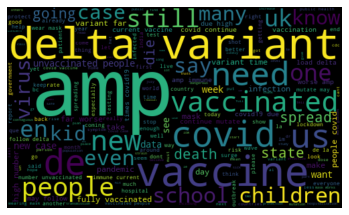

In [111]:
##plotting a cleaner wordcloud 
allWords = ''.join([twts for twts in df1['cleaned_tweets']])
wordCloud = WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)
plt.imshow(wordCloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [116]:
# create a function to compute the negitive neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negitive'
  elif score == 0:
    return 'Neutral'  
  else:
    return 'Positive'



df1['Sentiments'] = df1['Polarity'].apply(getAnalysis)
df1

,cleaned_tweets,Subjectivity,Polarity,Analysis,Sentiments
0,queremos ver el da social psicol gico econ mic...,0.283333,-0.233333,Negitive,Negitive
1,amp totally rule compliant mainly feel like tr...,0.566667,0.177778,Positive,Positive
2,originally discovered india last december beco...,0.408333,0.187500,Positive,Positive
3,funny latest variant affecting younger generat...,0.683333,0.229167,Positive,Positive
4,wow appalling tabloid journalism explaining so...,0.700000,-0.016667,Negitive,Negitive
...,...,...,...,...,...
24026,viral load delta variant 1200 times covid19 du...,0.583000,-0.053000,Negitive,Negitive
24027,new type delta variant spreading denmark,0.454545,0.136364,Positive,Positive
24028,iove seeing everyone lying case milder actuall...,0.350000,0.000000,Neutral,Neutral
24029,,0.000000,0.000000,Neutral,Neutral


In [130]:
# print all the postive tweets 
j =1 
sortedDF =df1.sort_values(by=['Polarity'])
for i in range (0,sortedDF.shape[0]):
  if(sortedDF['Sentiments'][i]=='Positive'):
    print(str(j) + ')' + sortedDF['cleaned_tweets'][i])
    print()
    j= j+1


Streaming output truncated to the last 5000 lines.
5681)new mexico access functional needs dafn resource guide comprehensive list covid related services information new mexicans

5682)since pandemic started seattle officers fire fighters amp frontline workers worked tirelessly spreads must take bold science based actions protect community vaccination requirement amp frontline worker pay right thing

5683)b c parents demanding transparency covid 19 exposures schools changes promised week strong enough bonnie henry

5684)wow interested see end result

5685)703 058 deaths covid usa moment 9 802 575 active cases almost 10 million cases right

5686)learned something new today dr marty makary john hopkins saline nasal spray help delta variant since use occasionally clear sinuses going start carrying

5687)206 icu capacity theyve added surge capacity beds drowning like alberta 94 icu beds capacity canceled surgeries north region completely collapsed

5688)regarding r 1 forget cdc outbreak rep

In [122]:
# print all the negitive tweets 
# print all the postive tweets 
j =1 
sortedDF =df1.sort_values(by=['Polarity'],ascending ='False')
for i in range (0,sortedDF.shape[0]):
  if(sortedDF['Sentiments'][i]=='Negitive'):
    print(str(j) + ')' + sortedDF['cleaned_tweets'][i])
    print()
    j= j+1

Streaming output truncated to the last 5000 lines.
2335)weekend please act every person approach might breathing lungfuls air capable passing deadly virus child vulnerable neighbor friend might get

2336)stubborn religious mania anti vaxxers trumpists name worst reason twice contagious original im triple vaxxed due cancer im tired amp angry

2337)predicted drag us key recovery video podcast blog

2338)predicted drag us key recovery video podcast blog

2339)predicted drag key us recovery video podcast blog

2340)predicted drag key us recovery video podcast blog

2341)crazy

2342)fucked point homeschool kids let conservative fucks kill

2343)classroom outbreak delta variant past spring marin county california reporter maria godoy lists six strategies based experts recommendations safer classroom

2344)maybe daily death count 1 000 might wear sorry forget busy sucking

2345)piling places arent even bad shape

2346)three weeks took three weeks kid get put quarantine another kid class teste

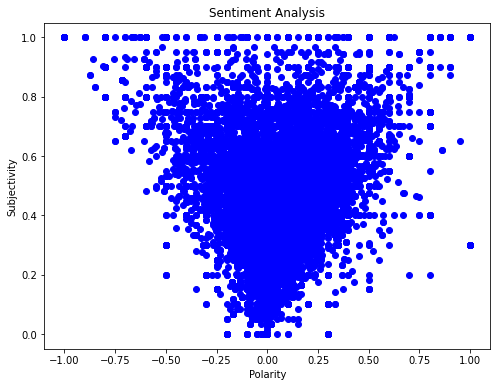

In [129]:
# plot the polarity and subjectivity 
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  
  plt.scatter(df1['Polarity'][i],df1['Subjectivity'][i],color = 'Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


In [131]:
# get percentage of positive tweets 
ptweets = df1[df1.Sentiments=='Positive']
ptweets = ptweets['cleaned_tweets']

round( (ptweets.shape[0] / df1.shape[0])* 100 , 1 )

34.0

In [132]:
# get percentage of negitive tweets 
ptweets = df1[df1.Sentiments=='Negitive']
ptweets = ptweets['cleaned_tweets']

round( (ptweets.shape[0] / df1.shape[0])* 100 , 1 )

20.1

In [133]:
# get percentage of Neutral tweets 
ptweets = df1[df1.Sentiments=='Neutral']
ptweets = ptweets['cleaned_tweets']

round( (ptweets.shape[0] / df1.shape[0])* 100 , 1 )

45.8

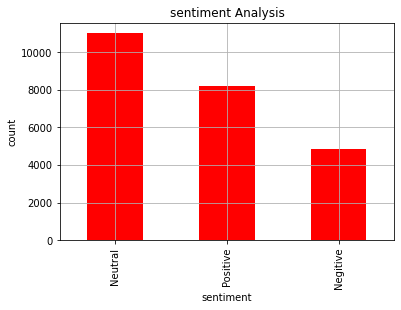

In [140]:
#show the value counts 
df1['Sentiments'].value_counts()
# plot and visualize the counts 
plt.title('sentiment Analysis')
plt.xlabel('sentiment')
plt.ylabel('count')
df1['Sentiments'].value_counts().plot(kind = 'bar',color = 'Red')
plt.grid()
plt.show()
